In [1]:
import requests
import pandas as pd

# URL DE LA API DEL BCRA

api_url = "https://api.bcra.gob.ar/estadisticas/v2.0/principalesvariables"

# Función para hacer la petición a la API
def obtener_datos_bcra():
  url = f"{api_url}"
  response = requests.get(url, verify=False) # Desactiva la verificación SSL
  return response.json()

df = pd.DataFrame(obtener_datos_bcra()["results"])
df.head()



/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,idVariable,cdSerie,descripcion,fecha,valor
0,1,246,Reservas Internacionales del BCRA (en millones...,2025-05-21,38176.0000
1,4,7927,Tipo de Cambio Minorista ($ por USD) Comunicac...,2025-05-23,1157.4300
2,5,272,Tipo de Cambio Mayorista ($ por USD) Comunicac...,2025-05-23,1137.0000
3,6,7935,Tasa de Política Monetaria (en % n.a.),2025-05-23,29.0000
4,7,1222,BADLAR en pesos de bancos privados (en % n.a.),2025-05-22,32.5625


No hay datos para el ID 20 (Depósitos a plazo). Respuesta: {'status': 404, 'errorMessages': ['IdVariable invalida.']}


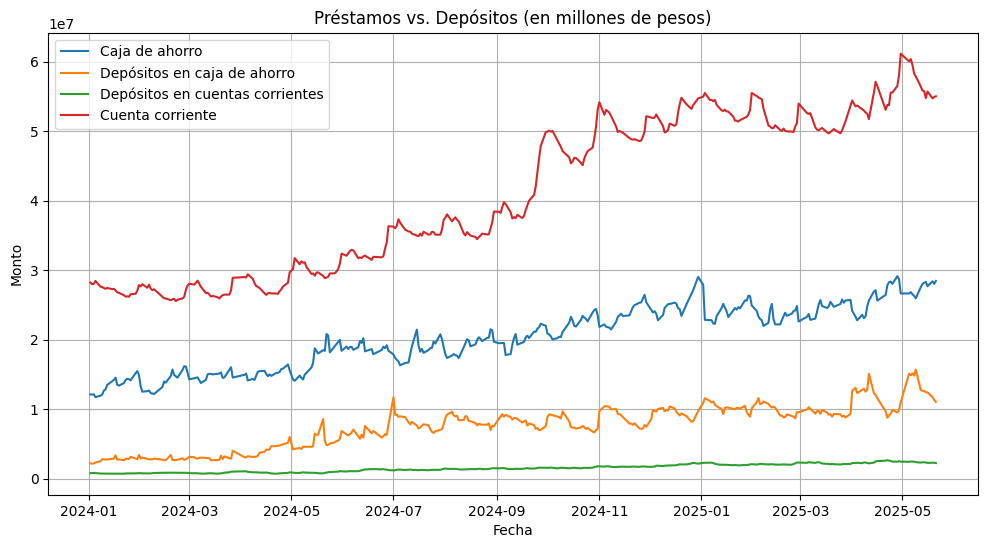

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import urllib3

# Desactivar el warning de certificado (solo para pruebas, no recomendado en producción)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

ids = {
    22: "Préstamos al sector privado",
    20: "Depósitos a plazo",
    19: "Depósitos en caja de ahorro",
    18: "Depósitos en cuentas corrientes",
    22:    "Caja de ahorro",
    23:"Cuenta corriente"
}

fecha_inicio = pd.to_datetime("2024-01-01")
dfs = {}

for id_var, nombre in ids.items():
    url = f"https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias/{id_var}"
    response = requests.get(url, verify=False)
    try:
        data_json = response.json()
        if "results" in data_json:
            data = data_json["results"]
            df = pd.DataFrame(data)
            df["fecha"] = pd.to_datetime(df["fecha"])
            df = df[df["fecha"] >= fecha_inicio]
            df = df.sort_values("fecha")
            dfs[nombre] = df
        else:
            print(f"No hay datos para el ID {id_var} ({nombre}). Respuesta: {data_json}")
    except Exception as e:
        print(f"Error procesando el ID {id_var} ({nombre}): {e}")

# Graficar solo si hay datos
if dfs:
    plt.figure(figsize=(12,6))
    for nombre, df in dfs.items():
        plt.plot(df["fecha"], df["valor"], label=nombre)
    plt.title("Préstamos vs. Depósitos (en millones de pesos)")
    plt.xlabel("Fecha")
    plt.ylabel("Monto")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron datos para graficar.")

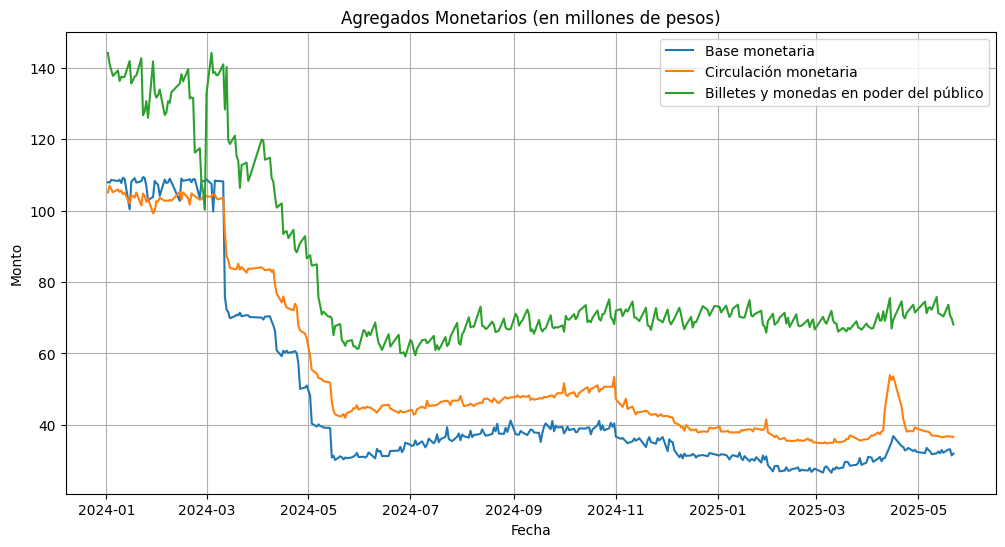

In [3]:
ids_agregados = {
    12: "Base monetaria",
    13: "Circulación monetaria",
    14: "Billetes y monedas en poder del público"
    # Puedes agregar más si tienes el ID correcto
}

dfs_agregados = {}

for id_var, nombre in ids_agregados.items():
    url = f"https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias/{id_var}"
    response = requests.get(url, verify=False)
    data = response.json()["results"]
    df = pd.DataFrame(data)
    df["fecha"] = pd.to_datetime(df["fecha"])
    df = df[df["fecha"] >= fecha_inicio]
    df = df.sort_values("fecha")
    dfs_agregados[nombre] = df

plt.figure(figsize=(12,6))
for nombre, df in dfs_agregados.items():
    plt.plot(df["fecha"], df["valor"], label=nombre)

plt.title("Agregados Monetarios (en millones de pesos)")
plt.xlabel("Fecha")
plt.ylabel("Monto")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import urllib3

# Desactivar el warning de certificado (solo para pruebas)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

ids_agregados = {
    17: "Circulante en poder del público",
    16: "Circulante"
    15: "Base Monetaria",
    # Agrega aquí los IDs de Base Monetaria Amplia, M2 Privado Transaccional, M2 total, M3 si los tienes
    # Ejemplo ficticio:
    # 50: "Base Monetaria Amplia",
    #25: "M2 Privado "
}

fecha_inicio = pd.to_datetime("2023-01-01")
dfs_agregados = {}

for id_var, nombre in ids_agregados.items():
    url = f"https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias/{id_var}"
    response = requests.get(url, verify=False)
    try:
        data_json = response.json()
        if "results" in data_json:
            data = data_json["results"]
            df = pd.DataFrame(data)
            df["fecha"] = pd.to_datetime(df["fecha"])
            df = df[df["fecha"] >= fecha_inicio]
            df = df.sort_values("fecha")
            dfs_agregados[nombre] = df
        else:
            print(f"No hay datos para el ID {id_var} ({nombre}). Respuesta: {data_json}")
    except Exception as e:
        print(f"Error procesando el ID {id_var} ({nombre}): {e}")

# Gráfico de líneas
plt.figure(figsize=(12,6))
for nombre, df in dfs_agregados.items():
    plt.plot(df["fecha"], df["valor"], label=nombre)

plt.title("Agregados Monetarios (en millones de pesos) desde 2023")
plt.xlabel("Fecha")
plt.ylabel("Monto")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-4-bdafba4b5b97>, line 11)

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# IDs de las variables (ajusta según los que tengas)
ids = {
    17: "Circulante en poder del público",
    250 : "Base Monetaria",
    # Agrega aquí los IDs de Base Monetaria Amplia, M2 Privado Transaccional, M2 total, M3 si los tienes
    # Ejemplo ficticio:
    # 50: "Base Monetaria Amplia",
    7919 : "M2 Privado "
    # 52: "M2 total",
    # 53: "M3"
}

# Diccionario para guardar los DataFrames de cada variable
dfs = {}

# Fecha de inicio (ajusta si quieres más datos)
fecha_inicio = pd.to_datetime("2024-01-01")

for id_var, nombre in ids.items():
    url = f"https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias/{id_var}"
    response = requests.get(url, verify=False)
    data = response.json()
    df = pd.DataFrame(data)
    df["fecha"] = pd.to_datetime(df["fecha"])
    df = df[df["fecha"] >= fecha_inicio]
    df = df.sort_values("fecha")
    df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
    dfs[nombre] = df

# Graficar cada variable en un subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, (nombre, df) in enumerate(dfs.items()):
    axs[i].plot(df["fecha"], df["valor"])
    axs[i].set_title(nombre, fontsize=13, fontweight="bold")
    axs[i].set_ylabel("Billones de pesos")
    axs[i].set_xlabel("")
    axs[i].tick_params(axis='x', rotation=45)
    # Calcular variación porcentual último mes
    if len(df) > 1:
        variacion = ((df["valor"].iloc[-1] - df["valor"].iloc[-2]) / df["valor"].iloc[-2]) * 100
        axs[i].text(0.5, -0.15, f"Variación último mes: {variacion:.1f}%", ha='center', va='center', transform=axs[i].transAxes, fontsize=11, color="brown")

plt.tight_layout()
plt.show()

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

# CALCULO M2 TRANSACCIONAL

In [ ]:
import requests
import pandas as pd

# IDs de las variables
ids = {
    "Circulante": 16,
    "Caja de ahorro": 22,
    "Cuenta corriente": 23
}

# Descargar los datos y armar un DataFrame por variable
dfs = []
for nombre, id_var in ids.items():
    url = f"https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias/{id_var}"
    response = requests.get(url, verify=False)
    data = response.json()["results"]
    df = pd.DataFrame(data)
    df["fecha"] = pd.to_datetime(df["fecha"])
    df = df.sort_values("fecha")
    df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
    df = df[["fecha", "valor"]].rename(columns={"valor": nombre})
    dfs.append(df)

# Unir los DataFrames por fecha
df_m2 = dfs[0]
for df in dfs[1:]:
    df_m2 = pd.merge(df_m2, df, on="fecha", how="outer")

# Calcular el M2
componentes = list(ids.keys())
df_m2["M2"] = df_m2[componentes].sum(axis=1)

# Ordenar por fecha y resetear índice
df_m2 = df_m2.sort_values("fecha").reset_index(drop=True)

# Mostrar el DataFrame actualizado
print(df_m2.tail())

# Guardar o usar el DataFrame como quieras
df_m2.to_csv("m2.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_m2["fecha"], df_m2["M2"], color='royalblue', label="M2")
plt.xlabel("Fecha")
plt.ylabel("M2 (millones de pesos)")
plt.title("Evolución del M2 en Argentina")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
for componente in componentes:
    plt.plot(df_m2["fecha"], df_m2[componente], label=componente)
plt.plot(df_m2["fecha"], df_m2["M2"], color='black', linewidth=2, label="M2 (Total)")
plt.xlabel("Fecha")
plt.ylabel("Millones de pesos")
plt.title("Evolución de los componentes del M2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()